In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

In [2]:
import pandas_ta as ta


In [3]:
df = pd.read_csv("C:/Users/sehsa/Downloads/df_eth_60min (1).csv")
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Target
0,2017-08-17 04:00:00,301.13,302.57,298.0,301.61,125.66877,2017-08-17 04:59:59.999,1
1,2017-08-17 05:00:00,301.61,303.28,300.0,303.10,377.67246,2017-08-17 05:59:59.999,0
2,2017-08-17 06:00:00,302.40,304.44,301.9,302.68,303.86672,2017-08-17 06:59:59.999,1
3,2017-08-17 07:00:00,302.68,307.96,302.6,307.96,754.74510,2017-08-17 07:59:59.999,1
4,2017-08-17 08:00:00,307.95,309.97,307.0,308.62,150.75029,2017-08-17 08:59:59.999,1


In [4]:
merged_data = pd.read_csv("C:/Users/sehsa/Downloads/eth_domi.csv")
merged_data.head()

,Open time,Open,High,Low,Close,Volume,Close time,Target,close
0,2017-08-17 04:00:00,301.13,302.57,298.0,301.61,125.66877,2017-08-17 04:59:59.999,1,57.170801
1,2017-08-17 05:00:00,301.61,303.28,300.0,303.10,377.67246,2017-08-17 05:59:59.999,0,57.170801
2,2017-08-17 06:00:00,302.40,304.44,301.9,302.68,303.86672,2017-08-17 06:59:59.999,1,57.170801
3,2017-08-17 07:00:00,302.68,307.96,302.6,307.96,754.74510,2017-08-17 07:59:59.999,1,57.170801
4,2017-08-17 08:00:00,307.95,309.97,307.0,308.62,150.75029,2017-08-17 08:59:59.999,1,57.170801


In [5]:
split_index = int(len(merged_data) * 0.8)  # %80 train, %20 test
train_df = merged_data.loc[:split_index - 1, :].copy()   #  %80
test_df = merged_data.loc[split_index:, :].copy()  #  %20

Adding indicators using pandas-ta

In [6]:
# 1. Simple Moving Average (SMA)
train_df['sma_2'] = ta.sma(train_df['Close'], length=2)  
train_df['sma_3'] = ta.sma(train_df['Close'], length=4)  
train_df['sma_4'] = ta.sma(train_df['Close'], length=3) 
train_df['sma_5'] = ta.sma(train_df['Close'], length=5)  
train_df['sma_6'] = ta.sma(train_df['Close'], length=6)  
train_df['sma_8'] = ta.sma(train_df['Close'], length=8)  
train_df['sma_12'] = ta.sma(train_df['Close'], length=12)  
train_df['sma_16'] = ta.sma(train_df['Close'], length=16) 
train_df['sma_24'] = ta.sma(train_df['Close'], length=24)  
train_df['sma_10'] = ta.sma(train_df['Close'], length=10) 
train_df['sma_48'] = ta.sma(train_df['Close'], length=48)  
# 2. Exponential Moving Average (EMA)
train_df['ema_2'] = ta.ema(train_df['Close'], length=2)  
train_df['ema_3'] = ta.ema(train_df['Close'], length=3) 
train_df['ema_4'] = ta.ema(train_df['Close'], length=4) 
train_df['ema_6'] = ta.ema(train_df['Close'], length=6)  
train_df['ema_8'] = ta.ema(train_df['Close'], length=8) 
train_df['ema_9'] = ta.ema(train_df['Close'], length=9) 
train_df['ema_12'] = ta.ema(train_df['Close'], length=12) 

# 3. Relative Strength Index (RSI)
train_df['rsı_2'] = ta.rsi(train_df['Close'], length=2)  
train_df['rsı_4'] = ta.rsi(train_df['Close'], length=4)  
train_df['rsı_6'] = ta.rsi(train_df['Close'], length=6)  
train_df['rsı_8'] = ta.rsi(train_df['Close'], length=8)
train_df['rsı_12'] = ta.rsi(train_df['Close'], length=12)  
train_df['rsı_24'] = ta.rsi(train_df['Close'], length=24)  

# 4. Momentum
train_df['mom_2'] = ta.mom(train_df['Close'], length=2)
train_df['mom_3'] = ta.mom(train_df['Close'], length=3)  
train_df['mom_4'] = ta.mom(train_df['Close'], length=4)  
train_df['mom_6'] = ta.mom(train_df['Close'], length=6)  
train_df['mom_8'] = ta.mom(train_df['Close'], length=8)  
train_df['mom_12'] = ta.mom(train_df['Close'], length=12)  

# 5. Commodity Channel Index
train_df['cci_2'] = ta.cci(train_df['High'], train_df['Low'], train_df['Close'], length=2)
train_df['cci_3'] = ta.cci(train_df['High'], train_df['Low'], train_df['Close'], length=3)  
train_df['cci_4'] = ta.cci(train_df['High'], train_df['Low'], train_df['Close'], length=4)  
train_df['cci_6'] = ta.cci(train_df['High'], train_df['Low'], train_df['Close'], length=6)  
train_df['cci_8'] = ta.cci(train_df['High'], train_df['Low'], train_df['Close'], length=8)  
train_df['cci_12'] = ta.cci(train_df['High'], train_df['Low'], train_df['Close'], length=12)  

# 6. Accumulation/Distribution Oscillator
train_df['ado'] = ta.ad(train_df['High'], train_df['Low'], train_df['Close'], train_df['Volume']) 


# 7. MACD (Moving Average Convergence Divergence)
macd = ta.macd(train_df['Close'])  # MACD
train_df = pd.concat([train_df, macd[['MACD_12_26_9', 'MACDs_12_26_9', 'MACDh_12_26_9']].rename(columns={'MACD_12_26_9': 'eth_MACD', 'MACDs_12_26_9': 'eth_MACD_signal', 'MACDh_12_26_9': 'eth_MACD_hist'})], axis=1)

# 9. Stochastic Oscillator (Stoch)
stoch = ta.stoch(train_df['High'], train_df['Low'], train_df['Close'])  # Stochastic
train_df = pd.concat([train_df, stoch.rename(columns=lambda x: 'eth_' + x)], axis=1)

# 10. Williams %R
train_df['eth_Williams_%R'] = ta.willr(train_df['High'], train_df['Low'], train_df['Close'])  # Williams %R

train_df = train_df.dropna()
train_df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Target,close,sma_2,...,cci_6,cci_8,cci_12,ado,eth_MACD,eth_MACD_signal,eth_MACD_hist,eth_STOCHk_14_3_3,eth_STOCHd_14_3_3,eth_Williams_%R
47,2017-08-19 03:00:00,298.64,298.64,292.83,293.22,66.73802,2017-08-19 03:59:59.999,0,54.39109,296.530,...,2.875399,32.319410,22.875017,493.378047,-2.627344,-2.940150,0.312807,53.412335,49.021066,-51.867220
48,2017-08-19 04:00:00,294.69,297.19,291.87,291.87,42.99260,2017-08-19 04:59:59.999,1,54.39109,292.545,...,-71.052007,-2.230640,2.851062,450.385447,-2.752230,-2.902566,0.150336,52.045861,52.196828,-53.814793
49,2017-08-19 05:00:00,291.87,299.90,291.87,293.23,35.01324,2017-08-19 05:59:59.999,0,54.39109,292.550,...,-35.178876,11.882980,46.039872,427.232234,-2.710221,-2.864097,0.153876,49.474662,51.644286,-45.894001
50,2017-08-19 06:00:00,293.23,295.56,289.02,289.02,45.02220,2017-08-19 06:59:59.999,1,54.39109,291.125,...,-144.128788,-141.125863,-61.206078,382.210034,-2.982263,-2.887730,-0.094533,44.040260,48.520261,-68.170426
51,2017-08-19 07:00:00,289.02,292.17,287.01,290.16,112.26406,2017-08-19 07:59:59.999,0,54.39109,289.590,...,-116.912347,-143.861874,-87.968012,407.012559,-3.070475,-2.924279,-0.146196,41.636001,45.050308,-61.027569


Convert the indicators into binary based on the rules described in the article

In [7]:
def convert_to_binary(train_df):
    # SMA and WMA: if current value is below the moving average then the trend is -1, otherwise +1
    train_df['sma_binary_2'] = np.where(train_df['Close'] >= train_df['sma_2'], 1, -1)
    train_df['sma_binary_3'] = np.where(train_df['Close'] >= train_df['sma_3'], 1, -1)
    train_df['sma_binary_4'] = np.where(train_df['Close'] >= train_df['sma_4'], 1, -1)
    train_df['sma_binary_5'] = np.where(train_df['Close'] >= train_df['sma_5'], 1, -1)
    train_df['sma_binary_6'] = np.where(train_df['Close'] >= train_df['sma_6'], 1, -1)
    train_df['sma_binary_8'] = np.where(train_df['Close'] >= train_df['sma_8'], 1, -1)
    train_df['sma_binary_12'] = np.where(train_df['Close'] >= train_df['sma_12'], 1, -1)
    train_df['sma_binary_16'] = np.where(train_df['Close'] >= train_df['sma_16'], 1, -1)
    train_df['sma_binary_24'] = np.where(train_df['Close'] >= train_df['sma_24'], 1, -1)
    train_df['sma_binary_10'] = np.where(train_df['Close'] >= train_df['sma_10'], 1, -1)
    train_df['sma_binary_48'] = np.where(train_df['Close'] >= train_df['sma_48'], 1, -1)


    train_df['wma_binary_9'] = np.where(train_df['Close'] >= train_df['ema_9'], 1, -1)
    train_df['wma_binary_2'] = np.where(train_df['Close'] >= train_df['ema_2'], 1, -1)
    train_df['wma_binary_3'] = np.where(train_df['Close'] >= train_df['ema_3'], 1, -1)
    train_df['wma_binary_4'] = np.where(train_df['Close'] >= train_df['ema_4'], 1, -1)
    train_df['wma_binary_6'] = np.where(train_df['Close'] >= train_df['ema_6'], 1, -1)
    train_df['wma_binary_8'] = np.where(train_df['Close'] >= train_df['ema_8'], 1, -1)
    train_df['wma_binary_12'] = np.where(train_df['Close'] >= train_df['ema_12'], 1, -1)

    # MOM: if the value of MOM is positive then the trend is +1, otherwise -1
    train_df['mom_binary_2'] = np.where(train_df['mom_2'] > 0, 1, -1)
    train_df['mom_binary_3'] = np.where(train_df['mom_3'] > 0, 1, -1)
    train_df['mom_binary_4'] = np.where(train_df['mom_4'] > 0, 1, -1)
    train_df['mom_binary_6'] = np.where(train_df['mom_6'] > 0, 1, -1)
    train_df['mom_binary_8'] = np.where(train_df['mom_8'] > 0, 1, -1)
    train_df['mom_binary_12'] = np.where(train_df['mom_12'] > 0, 1, -1)

    # BTC DOM: if current value is greater than the previous value, then -1, otherwise +1

    train_df['close_binary'] = np.where(train_df['close'].diff() > 0, -1, 1)


    # STCK, STCD: if current value is greater than the previous value, then +1, otherwise -1
    train_df['stoch_k_binary'] = np.where(train_df['eth_STOCHk_14_3_3'].diff() > 0, 1, -1)
    train_df['stoch_d_binary'] = np.where(train_df['eth_STOCHd_14_3_3'].diff() > 0, 1, -1)

    # RSI: >70 is -1, <30 is +1; between 30 and 70, if the current value is greater than the previous value, +1, otherwise -1
    train_df['rsi_binary_4'] = np.where(train_df['rsı_4'] > 70, -1, np.where(train_df['rsı_4'] < 30, 1, np.where(train_df['rsı_4'] > train_df['rsı_4'].shift(1), 1, -1)))
    train_df['rsi_binary_2'] = np.where(train_df['rsı_2'] > 70, -1, np.where(train_df['rsı_2'] < 30, 1, np.where(train_df['rsı_2'] > train_df['rsı_2'].shift(1), 1, -1)))
    train_df['rsi_binary_6'] = np.where(train_df['rsı_6'] > 70, -1, np.where(train_df['rsı_6'] < 30, 1, np.where(train_df['rsı_6'] > train_df['rsı_6'].shift(1), 1, -1)))
    train_df['rsi_binary_8'] = np.where(train_df['rsı_8'] > 70, -1, np.where(train_df['rsı_8'] < 30, 1, np.where(train_df['rsı_8'] > train_df['rsı_8'].shift(1), 1, -1)))
    train_df['rsi_binary_12'] = np.where(train_df['rsı_12'] > 70, -1, np.where(train_df['rsı_12'] < 30, 1, np.where(train_df['rsı_12'] > train_df['rsı_12'].shift(1), 1, -1)))
    train_df['rsi_binary_24'] = np.where(train_df['rsı_24'] > 70, -1, np.where(train_df['rsı_24'] < 30, 1, np.where(train_df['rsı_24'] > train_df['rsı_24'].shift(1), 1, -1)))
    
    # CCI: >200 is -1, <-200 is +1; between -200 and 200, if the current value is greater than the previous value, +1, otherwise -1
    train_df['cci_binary_2'] = np.where(train_df['cci_2'] > 200, -1, np.where(train_df['cci_2'] < -200, 1, np.where(train_df['cci_2'] > train_df['cci_2'].shift(1), 1, -1)))
    train_df['cci_binary_3'] = np.where(train_df['cci_3'] > 200, -1, np.where(train_df['cci_3'] < -200, 1, np.where(train_df['cci_3'] > train_df['cci_2'].shift(1), 1, -1)))
    train_df['cci_binary_4'] = np.where(train_df['cci_4'] > 200, -1, np.where(train_df['cci_4'] < -200, 1, np.where(train_df['cci_4'] > train_df['cci_2'].shift(1), 1, -1)))
    train_df['cci_binary_6'] = np.where(train_df['cci_6'] > 200, -1, np.where(train_df['cci_6'] < -200, 1, np.where(train_df['cci_6'] > train_df['cci_2'].shift(1), 1, -1)))
    train_df['cci_binary_8'] = np.where(train_df['cci_8'] > 200, -1, np.where(train_df['cci_8'] < -200, 1, np.where(train_df['cci_8'] > train_df['cci_2'].shift(1), 1, -1)))
    train_df['cci_binary_12'] = np.where(train_df['cci_12'] > 200, -1, np.where(train_df['cci_12'] < -200, 1, np.where(train_df['cci_12'] > train_df['cci_2'].shift(1), 1, -1)))

    # MACD: if current value (time t) is more than the previous value (time t-1) then the trend is +1, otherwise -1
    train_df['macd_binary'] = np.where(train_df['eth_MACD'].diff() > 0, 1, -1)

    # ADO: if current value (time t) is more than the previous value (time t-1) then the trend is +1, otherwise -1
    train_df['ado_binary'] = np.where(train_df['ado'].diff() > 0, 1, -1)
    
    # Williams %R: >-20 is -1, <-80 is +1; otherwise, based on the trend
    train_df['eth_Williams_%R_binary'] = np.where(train_df['eth_Williams_%R'] > -20, -1, np.where(train_df['eth_Williams_%R'] < -80, 1, np.where(train_df['eth_Williams_%R'] > train_df['eth_Williams_%R'].shift(1), 1, -1)))

    return train_df

# Apply the function to convert the dataset indicators to binary
data_binary = convert_to_binary(train_df)
data_binary.head()


,Open time,Open,High,Low,Close,Volume,Close time,Target,close,sma_2,...,rsi_binary_24,cci_binary_2,cci_binary_3,cci_binary_4,cci_binary_6,cci_binary_8,cci_binary_12,macd_binary,ado_binary,eth_Williams_%R_binary
47,2017-08-19 03:00:00,298.64,298.64,292.83,293.22,66.73802,2017-08-19 03:59:59.999,0,54.39109,296.530,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
48,2017-08-19 04:00:00,294.69,297.19,291.87,291.87,42.99260,2017-08-19 04:59:59.999,1,54.39109,292.545,...,-1,1,-1,-1,-1,1,1,-1,-1,-1
49,2017-08-19 05:00:00,291.87,299.90,291.87,293.23,35.01324,2017-08-19 05:59:59.999,0,54.39109,292.550,...,1,1,1,1,1,1,1,1,-1,1
50,2017-08-19 06:00:00,293.23,295.56,289.02,289.02,45.02220,2017-08-19 06:59:59.999,1,54.39109,291.125,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
51,2017-08-19 07:00:00,289.02,292.17,287.01,290.16,112.26406,2017-08-19 07:59:59.999,0,54.39109,289.590,...,1,1,-1,-1,-1,-1,-1,-1,1,1


In [8]:
selected_columns_deneme = ['Close','sma_2','sma_binary_2','sma_8','sma_binary_8','close','close_binary']
data = data_binary[selected_columns_deneme]
data.head()

,Close,sma_2,sma_binary_2,sma_8,sma_binary_8,close,close_binary
47,293.22,296.530,-1,293.94500,-1,54.39109,1
48,291.87,292.545,-1,293.94500,-1,54.39109,1
49,293.23,292.550,1,294.81125,-1,54.39109,1
50,289.02,291.125,-1,294.22125,-1,54.39109,1
51,290.16,289.590,1,293.74625,-1,54.39109,1


In [9]:
# Filter the binary columns and the target column
binary_columns = [col for col in data_binary.columns if 'binary' in col]
binary_columns.append('Target')  # Add the target column

# Create a new DataFrame with only binary columns and the target
df_binary_model = data_binary[binary_columns]
df_binary_model.head()

,sma_binary_2,sma_binary_3,sma_binary_4,sma_binary_5,sma_binary_6,sma_binary_8,sma_binary_12,sma_binary_16,sma_binary_24,sma_binary_10,...,cci_binary_2,cci_binary_3,cci_binary_4,cci_binary_6,cci_binary_8,cci_binary_12,macd_binary,ado_binary,eth_Williams_%R_binary,Target
47,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
48,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,1,1,-1,-1,-1,1
49,1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,-1,1,0
50,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
51,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,1,1,0


MODEL GENERATION WITH BINARY DATA

In [10]:
# Split the data into features and target
X = df_binary_model.drop(columns=['Target'])
y = df_binary_model['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.5211
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51      7585
           1       0.52      0.54      0.53      7569

    accuracy                           0.52     15154
   macro avg       0.52      0.52      0.52     15154
weighted avg       0.52      0.52      0.52     15154



In [11]:
# Train a LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate model performance
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
class_report_lgb = classification_report(y_test, y_pred_lgb)

print(f"Accuracy: {accuracy_lgb:.4f}")
print("Classification Report:")
print(class_report_lgb)

[LightGBM] [Info] Number of positive: 17920, number of negative: 17439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 35359, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506802 -> initscore=0.027208
[LightGBM] [Info] Start training from score 0.027208
Accuracy: 0.5407
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.50      0.52      7585
           1       0.54      0.59      0.56      7569

    accuracy                           0.54     15154
   macro avg       0.54      0.54      0.54     15154
weighted avg       0.54      0.54      0.54     15154



In [12]:
# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb:.4f}")
print("Classification Report:")
print(report_xgb)

c:\Users\sehsa\ETH\.conda\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:50:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.5382
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.51      0.52      7585
           1       0.54      0.57      0.55      7569

    accuracy                           0.54     15154
   macro avg       0.54      0.54      0.54     15154
weighted avg       0.54      0.54      0.54     15154



In [13]:
# Train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)
# Evaluate the model's performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

print(f"Accuracy: {accuracy_logreg:.4f}")
print("Classification Report:")
print(report_logreg)

Accuracy: 0.5437
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.50      0.53      7585
           1       0.54      0.58      0.56      7569

    accuracy                           0.54     15154
   macro avg       0.54      0.54      0.54     15154
weighted avg       0.54      0.54      0.54     15154



In [28]:
# ROC Curve kullanarak FPR, TPR ve thresholdları hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Youden's Index'i hesapla (TPR - FPR)
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold based on Youden's Index: {optimal_threshold:.4f}")

# Yeni threshold ile tahminler yap
y_pred_custom = (y_pred_proba >= optimal_threshold).astype(int)

# Performansı değerlendir
accuracy_custom = accuracy_score(y_test, y_pred_custom)
report_custom = classification_report(y_test, y_pred_custom)

print(f"Accuracy with optimal threshold: {accuracy_custom:.4f}")
print("Classification Report with optimal threshold:")
print(report_custom)

Optimal threshold based on Youden's Index: 0.5058
Accuracy with optimal threshold: 0.5464
Classification Report with optimal threshold:
              precision    recall  f1-score   support

           0       0.55      0.54      0.54      7585
           1       0.55      0.55      0.55      7569

    accuracy                           0.55     15154
   macro avg       0.55      0.55      0.55     15154
weighted avg       0.55      0.55      0.55     15154



I want to identify pairs of features with high correlation in my feature set.

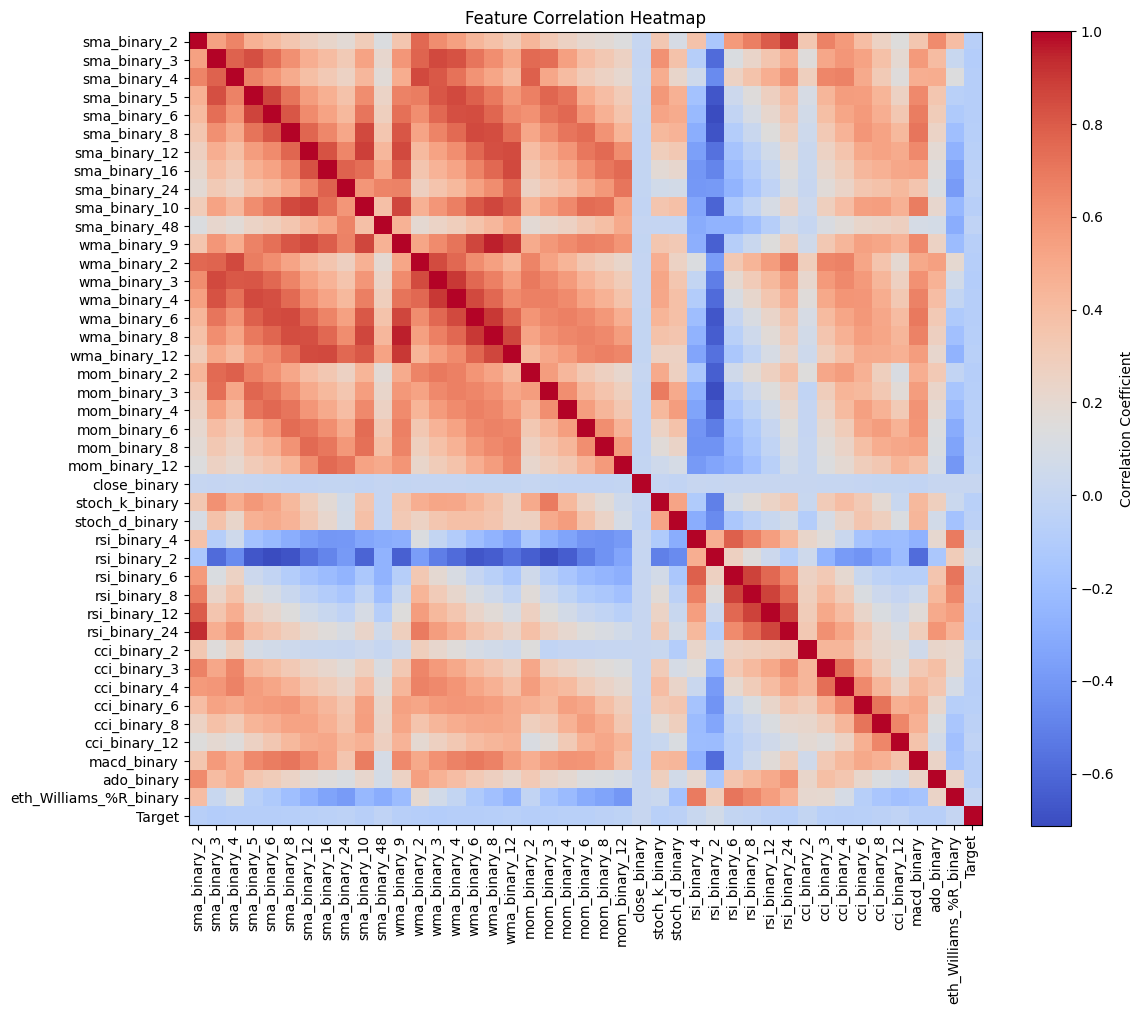

[('sma_binary_5', 'wma_binary_4'),
 ('sma_binary_3', 'wma_binary_3'),
 ('sma_binary_5', 'sma_binary_6'),
 ('sma_binary_10', 'wma_binary_9'),
 ('wma_binary_4', 'wma_binary_6'),
 ('rsi_binary_24', 'sma_binary_2'),
 ('rsi_binary_6', 'rsi_binary_8'),
 ('sma_binary_10', 'wma_binary_8'),
 ('wma_binary_2', 'wma_binary_3'),
 ('sma_binary_12', 'wma_binary_9'),
 ('sma_binary_10', 'sma_binary_12'),
 ('wma_binary_12', 'wma_binary_9'),
 ('rsi_binary_12', 'rsi_binary_24'),
 ('sma_binary_4', 'wma_binary_2'),
 ('wma_binary_3', 'wma_binary_4'),
 ('wma_binary_6', 'wma_binary_9'),
 ('wma_binary_12', 'wma_binary_8'),
 ('wma_binary_8', 'wma_binary_9'),
 ('sma_binary_16', 'wma_binary_12'),
 ('sma_binary_10', 'sma_binary_8'),
 ('rsi_binary_12', 'rsi_binary_8'),
 ('sma_binary_8', 'wma_binary_6'),
 ('wma_binary_6', 'wma_binary_8')]

In [34]:
# Compute the correlation matrix
correlation_matrix = df_binary_model.corr()

# Set a threshold for high correlation
correlation_threshold = 0.85

# Identify highly correlated features
high_correlation_pairs = [
    (col1, col2)
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > correlation_threshold
]

# Filter for unique pairs
unique_high_correlation_pairs = list(set(tuple(sorted(pair)) for pair in high_correlation_pairs))

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
plt.title("Feature Correlation Heatmap")
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label="Correlation Coefficient")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.show()

# Display pairs of highly correlated features
unique_high_correlation_pairs

In [35]:
# Automatically retain one feature from each pair
# Use the first feature in each pair for retention
features_to_drop = set(pair[1] for pair in unique_high_correlation_pairs)

# Drop the identified highly correlated features
df_reduced = df_binary_model.drop(columns=features_to_drop)


In [36]:
# Split the data into features and target
X = df_reduced.drop(columns=['Target'])
y = df_reduced['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Accuracy xgb: {accuracy_xgb:.4f}")
print("Classification Report xgb:")
print(report_xgb)

# Train a LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate model performance
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
class_report_lgb = classification_report(y_test, y_pred_lgb)

print(f"Accuracy lgb: {accuracy_lgb:.4f}")
print("Classification Report lgb:")
print(class_report_lgb)

# Train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)
# Evaluate the model's performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

print(f"Accuracy logreg: {accuracy_logreg:.4f}")
print("Classification Report logreg:")
print(report_logreg)

Accuracy: 0.5237
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.49      0.51      7585
           1       0.52      0.56      0.54      7569

    accuracy                           0.52     15154
   macro avg       0.52      0.52      0.52     15154
weighted avg       0.52      0.52      0.52     15154



c:\Users\sehsa\ETH\.conda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:41:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy xgb: 0.5383
Classification Report xgb:
              precision    recall  f1-score   support

           0       0.54      0.50      0.52      7585
           1       0.54      0.57      0.55      7569

    accuracy                           0.54     15154
   macro avg       0.54      0.54      0.54     15154
weighted avg       0.54      0.54      0.54     15154

[LightGBM] [Info] Number of positive: 17920, number of negative: 17439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 35359, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506802 -> initscore=0.027208
[LightGBM] [Info] Start training from score 0.027208
Accuracy lgb: 0.5401
Classification Report lgb:
              precision    recall  f1-score   support

           0       0.54      0.5

No significant changes were observed in the model results. I want to check the feature importance in the LogisticRegression model, which gave the best result.

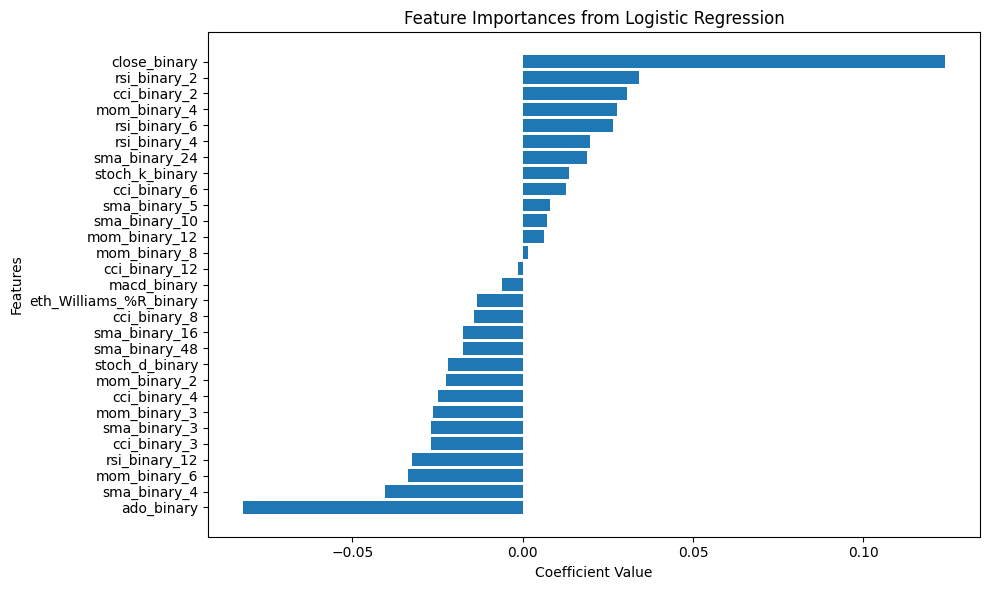

Logistic Regression Accuracy: 0.5458624785535172

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.51      0.53      7585
           1       0.54      0.58      0.56      7569

    accuracy                           0.55     15154
   macro avg       0.55      0.55      0.55     15154
weighted avg       0.55      0.55      0.55     15154


Feature Importances:
                    Feature  Importance
13            close_binary    0.123990
17            rsi_binary_2    0.034048
20            cci_binary_2    0.030591
9             mom_binary_4    0.027790
18            rsi_binary_6    0.026612
16            rsi_binary_4    0.019875
4            sma_binary_24    0.018865
14          stoch_k_binary    0.013568
23            cci_binary_6    0.012688
2             sma_binary_5    0.007997
5            sma_binary_10    0.007200
12           mom_binary_12    0.006385
11            mom_binary_8    0.001684
25           cci_binary_12   -

In [37]:
# Extract feature importance from logistic regression coefficients
logreg_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': logreg_model.coef_[0]  # Logistic Regression coefficients
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(logreg_importance_df['Feature'], logreg_importance_df['Importance'], align='center')
plt.title('Feature Importances from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.tight_layout()
plt.show()

# Display evaluation results and importance DataFrame
print("Logistic Regression Accuracy:", accuracy_logreg)
print("\nClassification Report:\n", report_logreg)
print("\nFeature Importances:\n", logreg_importance_df)

Here, I wanted to analyze the model results using one indicator from a short time period and one from a medium time period.

In [41]:
short_time_features = ['close_binary','sma_binary_2','wma_binary_2','rsi_binary_2', 'mom_binary_2','cci_binary_2','macd_binary','ado_binary','eth_Williams_%R_binary','stoch_k_binary','stoch_d_binary',]

In [72]:
# Split the data into features and target
X = df_binary_model[short_time_features]
y = df_binary_model['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.5405
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.49      0.51      7585
           1       0.54      0.60      0.56      7569

    accuracy                           0.54     15154
   macro avg       0.54      0.54      0.54     15154
weighted avg       0.54      0.54      0.54     15154



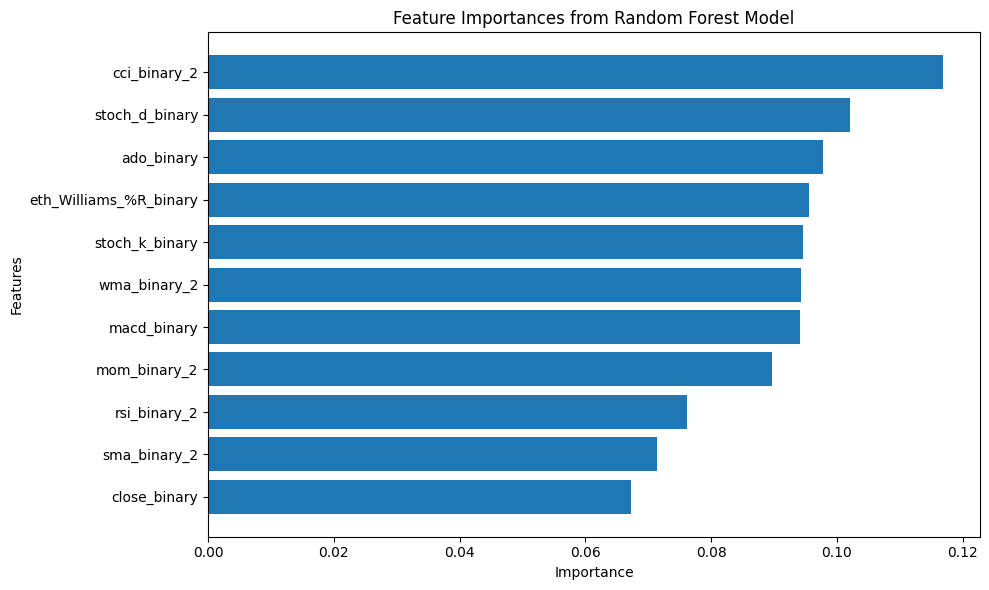

In [43]:
# Extract feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Filter features with importance >= 0.02
filtered_importance_df = importance_df[importance_df['Importance'] >= 0.02]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.tight_layout()
plt.show()


In [52]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [33]:
# Modeli tanımlama
rf_model = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Modeli eğitme
rf_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = rf_model.predict(X_test)

# Performans değerlendirme
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.5410
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53      7624
           1       0.54      0.57      0.55      7541

    accuracy                           0.54     15165
   macro avg       0.54      0.54      0.54     15165
weighted avg       0.54      0.54      0.54     15165



In [46]:
# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)


print(f"Accuracy: {accuracy_xgb:.4f}")
print("Classification Report:")
print(report_xgb)

c:\Users\sehsa\ETH\.conda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:44:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.5395
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.49      0.51      7585
           1       0.54      0.59      0.56      7569

    accuracy                           0.54     15154
   macro avg       0.54      0.54      0.54     15154
weighted avg       0.54      0.54      0.54     15154



In [45]:
# Train a LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate model performance
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
class_report_lgb = classification_report(y_test, y_pred_lgb)

print(f"Accuracy: {accuracy_lgb:.4f}")
print("Classification Report:")
print(class_report_lgb)

[LightGBM] [Info] Number of positive: 17920, number of negative: 17439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33
[LightGBM] [Info] Number of data points in the train set: 35359, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506802 -> initscore=0.027208
[LightGBM] [Info] Start training from score 0.027208
Accuracy: 0.5420
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.49      0.52      7585
           1       0.54      0.59      0.56      7569

    accuracy                           0.54     15154
   macro avg       0.54      0.54      0.54     15154
weighted avg       0.54      0.54      0.54     15154



In [78]:
# Train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)
# Evaluate the model's performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

print(f"Accuracy: {accuracy_logreg:.4f}")
print("Classification Report:")
print(report_logreg)

Accuracy: 0.5422
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.50      0.52      7585
           1       0.54      0.59      0.56      7569

    accuracy                           0.54     15154
   macro avg       0.54      0.54      0.54     15154
weighted avg       0.54      0.54      0.54     15154



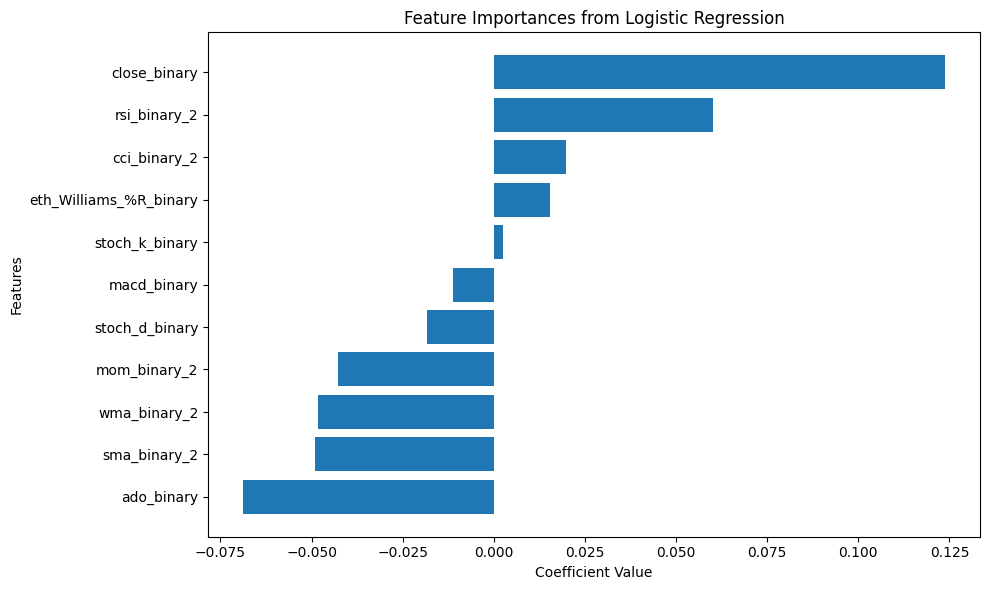

Logistic Regression Accuracy: 0.5421670845981259

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.50      0.52      7585
           1       0.54      0.59      0.56      7569

    accuracy                           0.54     15154
   macro avg       0.54      0.54      0.54     15154
weighted avg       0.54      0.54      0.54     15154


Feature Importances:
                    Feature  Importance
0             close_binary    0.123768
3             rsi_binary_2    0.060149
5             cci_binary_2    0.019784
8   eth_Williams_%R_binary    0.015372
9           stoch_k_binary    0.002469
6              macd_binary   -0.011259
10          stoch_d_binary   -0.018336
4             mom_binary_2   -0.042836
2             wma_binary_2   -0.048147
1             sma_binary_2   -0.048943
7               ado_binary   -0.068758


In [47]:
# Extract feature importance from logistic regression coefficients
logreg_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': logreg_model.coef_[0]  # Logistic Regression coefficients
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(logreg_importance_df['Feature'], logreg_importance_df['Importance'], align='center')
plt.title('Feature Importances from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.tight_layout()
plt.show()

# Display evaluation results and importance DataFrame
print("Logistic Regression Accuracy:", accuracy_logreg)
print("\nClassification Report:\n", report_logreg)
print("\nFeature Importances:\n", logreg_importance_df)

In [48]:
# Set threshold for feature importance
threshold = 0.01

# Filter features based on importance
significant_features = logreg_importance_df[
    logreg_importance_df['Importance'].abs() >= threshold
]['Feature']

# Update X with only significant features
X_filtered = X[significant_features]

# Train-test split with filtered features
X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, random_state=42)

# Train a new Logistic Regression model with filtered features
logreg_model_filtered = LogisticRegression(max_iter=1000, random_state=42)
logreg_model_filtered.fit(X_train_filtered, y_train)

# Make predictions with the filtered model
y_pred_filtered = logreg_model_filtered.predict(X_test_filtered)

# Evaluate the filtered model
accuracy_filtered = accuracy_score(y_test, y_pred_filtered)
report_filtered = classification_report(y_test, y_pred_filtered)

# Display results
print("Filtered Logistic Regression Accuracy:", accuracy_filtered)
print("\nClassification Report (Filtered Features):\n", report_filtered)


Filtered Logistic Regression Accuracy: 0.5422330737759008

Classification Report (Filtered Features):
               precision    recall  f1-score   support

           0       0.55      0.50      0.52      7585
           1       0.54      0.59      0.56      7569

    accuracy                           0.54     15154
   macro avg       0.54      0.54      0.54     15154
weighted avg       0.54      0.54      0.54     15154



MODEL GENERATION WITH CONTINOUS DATA

In [53]:
# Seçmek istediğiniz kolonlar
selected_columns = ['Target','Close','close','sma_2', 'sma_3', 'sma_4', 'sma_5', 'sma_6', 'sma_8', 'sma_12', 'sma_16', 'sma_24', 'sma_10', 'sma_48', 'ema_2', 'ema_3', 'ema_4', 'ema_6', 'ema_8', 'ema_9', 'ema_12', 'rsı_2', 'rsı_4', 'rsı_6', 'rsı_8', 'rsı_12', 'rsı_24', 'mom_2', 'mom_3', 'mom_4', 'mom_6', 'mom_8', 'mom_12', 'cci_2', 'cci_3', 'cci_4', 'cci_6', 'cci_8', 'cci_12', 'ado', 'eth_MACD', 'eth_MACD_signal', 'eth_MACD_hist', 'eth_STOCHk_14_3_3', 'eth_STOCHd_14_3_3', 'eth_Williams_%R',]
# Yeni DataFrame oluşturma
df_continous_model = train_df[selected_columns]

In [54]:
df_continous_model = df_continous_model.replace([np.inf, -np.inf], 0)
np.isinf(df_continous_model).sum()

Target               0
Close                0
close                0
sma_2                0
sma_3                0
sma_4                0
sma_5                0
sma_6                0
sma_8                0
sma_12               0
sma_16               0
sma_24               0
sma_10               0
sma_48               0
ema_2                0
ema_3                0
ema_4                0
ema_6                0
ema_8                0
ema_9                0
ema_12               0
rsı_2                0
rsı_4                0
rsı_6                0
rsı_8                0
rsı_12               0
rsı_24               0
mom_2                0
mom_3                0
mom_4                0
mom_6                0
mom_8                0
mom_12               0
cci_2                0
cci_3                0
cci_4                0
cci_6                0
cci_8                0
cci_12               0
ado                  0
eth_MACD             0
eth_MACD_signal      0
eth_MACD_hist        0
eth_STOCHk_

In [60]:
df_continous_model = df_continous_model.rename(columns={'close': 'btc_dom'})

In [55]:
# Split the data into features and target
X = df_continous_model.drop(columns=['Target', 'ado'])
y = df_continous_model['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)
# Evaluate the model's performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

print(f"Accuracy: {accuracy_logreg:.4f}")
print("Classification Report:")
print(report_logreg)


Accuracy: 0.5439
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53      7585
           1       0.54      0.57      0.56      7569

    accuracy                           0.54     15154
   macro avg       0.54      0.54      0.54     15154
weighted avg       0.54      0.54      0.54     15154



c:\Users\sehsa\ETH\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb:.4f}")
print("Classification Report:")
print(report_xgb)


c:\Users\sehsa\ETH\.conda\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:53:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.5251
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.50      0.51      7585
           1       0.52      0.55      0.54      7569

    accuracy                           0.53     15154
   macro avg       0.53      0.53      0.52     15154
weighted avg       0.53      0.53      0.52     15154



In [57]:
# Train a LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate model performance
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
class_report_lgb = classification_report(y_test, y_pred_lgb)

print(f"Accuracy: {accuracy_lgb:.4f}")
print("Classification Report:")
print(class_report_lgb)



[LightGBM] [Info] Number of positive: 17920, number of negative: 17439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11220
[LightGBM] [Info] Number of data points in the train set: 35359, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506802 -> initscore=0.027208
[LightGBM] [Info] Start training from score 0.027208
Accuracy: 0.5356
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.48      0.51      7585
           1       0.53      0.59      0.56      7569

    accuracy                           0.54     15154
   macro avg       0.54      0.54      0.53     15154
weighted avg       0.54      0.54      0.53     15154



In [58]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy: 0.5335
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.52      0.53      7585
           1       0.53      0.54      0.54      7569

    accuracy                           0.53     15154
   macro avg       0.53      0.53      0.53     15154
weighted avg       0.53      0.53      0.53     15154



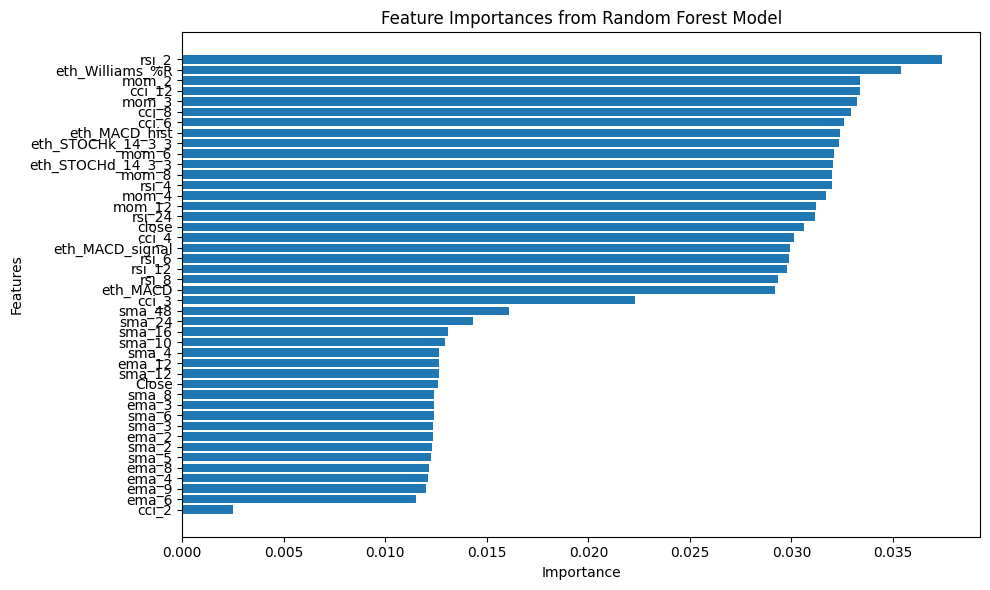

In [59]:
# Extract feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Filter features with importance >= 0.02
filtered_importance_df = importance_df[importance_df['Importance'] >= 0.02]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.tight_layout()
plt.show()


I just wanted to analyze the model results using indicators from only a short time period here.

In [66]:
selected_features = ['sma_2','ema_2','rsı_2','mom_2','cci_2','ado','eth_MACD','eth_MACD_signal','eth_MACD_hist','eth_STOCHk_14_3_3','eth_STOCHd_14_3_3','eth_Williams_%R']

In [67]:
# Split the data into features and target
X = df_continous_model[selected_features]
y = df_continous_model['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.5263
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.50      0.52      7585
           1       0.52      0.55      0.54      7569

    accuracy                           0.53     15154
   macro avg       0.53      0.53      0.53     15154
weighted avg       0.53      0.53      0.53     15154



In [80]:
# Train a LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate model performance
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
class_report_lgb = classification_report(y_test, y_pred_lgb)

print(f"Accuracy: {accuracy_lgb:.4f}")
print("Classification Report:")
print(class_report_lgb)



[LightGBM] [Info] Number of positive: 17962, number of negative: 17422
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 35384, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507631 -> initscore=0.030525
[LightGBM] [Info] Start training from score 0.030525
Accuracy: 0.5359
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.47      0.51      7624
           1       0.53      0.60      0.56      7541

    accuracy                           0.54     15165
   macro avg       0.54      0.54      0.53     15165
weighted avg       0.54      0.54      0.53     15165



In [81]:
# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb:.4f}")
print("Classification Report:")
print(report_xgb)


C:\Users\sehsa\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:28:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.5223
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.49      0.51      7624
           1       0.52      0.55      0.54      7541

    accuracy                           0.52     15165
   macro avg       0.52      0.52      0.52     15165
weighted avg       0.52      0.52      0.52     15165



In [68]:
# Train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)
# Evaluate the model's performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

print(f"Accuracy: {accuracy_logreg:.4f}")
print("Classification Report:")
print(report_logreg)


Accuracy: 0.5383
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.50      0.52      7585
           1       0.54      0.58      0.55      7569

    accuracy                           0.54     15154
   macro avg       0.54      0.54      0.54     15154
weighted avg       0.54      0.54      0.54     15154



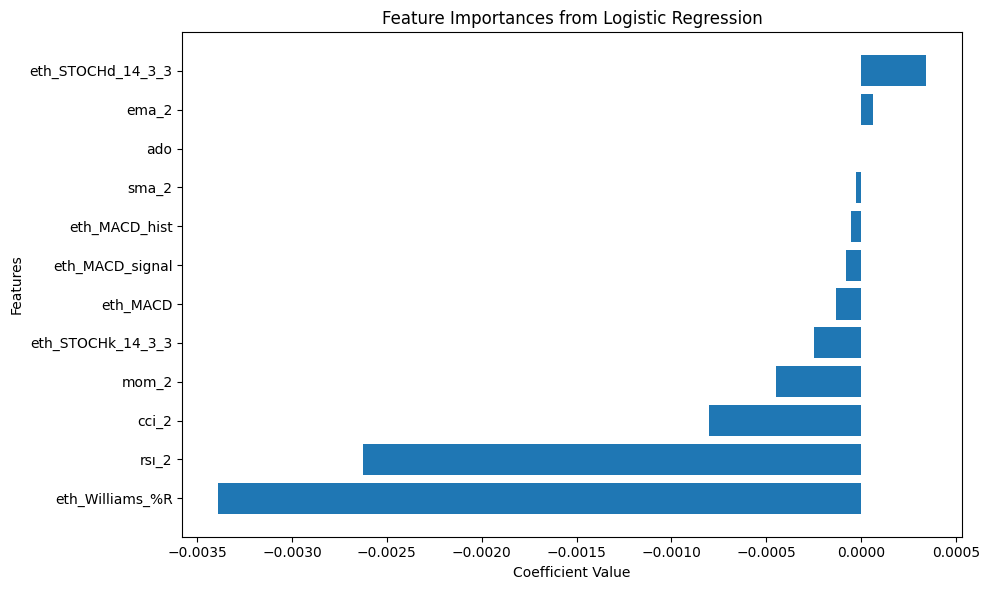

Logistic Regression Accuracy: 0.53827372310941

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52      7585
           1       0.54      0.58      0.55      7569

    accuracy                           0.54     15154
   macro avg       0.54      0.54      0.54     15154
weighted avg       0.54      0.54      0.54     15154


Feature Importances:
               Feature    Importance
10  eth_STOCHd_14_3_3  3.437703e-04
1               ema_2  6.366718e-05
5                 ado -1.889871e-09
0               sma_2 -2.574850e-05
8       eth_MACD_hist -5.299384e-05
7     eth_MACD_signal -7.988460e-05
6            eth_MACD -1.328780e-04
9   eth_STOCHk_14_3_3 -2.504932e-04
3               mom_2 -4.462424e-04
4               cci_2 -8.001707e-04
2               rsı_2 -2.625377e-03
11    eth_Williams_%R -3.391890e-03


In [69]:
# Extract feature importance from logistic regression coefficients
logreg_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': logreg_model.coef_[0]  # Logistic Regression coefficients
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(logreg_importance_df['Feature'], logreg_importance_df['Importance'], align='center')
plt.title('Feature Importances from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.tight_layout()
plt.show()

# Display evaluation results and importance DataFrame
print("Logistic Regression Accuracy:", accuracy_logreg)
print("\nClassification Report:\n", report_logreg)
print("\nFeature Importances:\n", logreg_importance_df)

In [76]:
selected_features_ado = ['sma_2','ema_2','rsı_2','mom_2','cci_2','eth_MACD','eth_MACD_signal','eth_MACD_hist','eth_STOCHk_14_3_3','eth_STOCHd_14_3_3','eth_Williams_%R']

In [77]:
# Split the data into features and target
X = df_continous_model[selected_features_ado]
y = df_continous_model['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)
# Evaluate the model's performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

accuracy_logreg, report_logreg


(0.5450049455984174,
 '              precision    recall  f1-score   support\n\n           0       0.55      0.51      0.53      7624\n           1       0.54      0.58      0.56      7541\n\n    accuracy                           0.55     15165\n   macro avg       0.55      0.55      0.54     15165\nweighted avg       0.55      0.55      0.54     15165\n')

Test data: I try to best model to my test data

In [70]:
# 1. Simple Moving Average (SMA)
test_df['sma_2'] = ta.sma(test_df['Close'], length=2)  
test_df['sma_3'] = ta.sma(test_df['Close'], length=4)  
test_df['sma_4'] = ta.sma(test_df['Close'], length=3) 
test_df['sma_5'] = ta.sma(test_df['Close'], length=5)  
test_df['sma_6'] = ta.sma(test_df['Close'], length=6)  
test_df['sma_8'] = ta.sma(test_df['Close'], length=8)  
test_df['sma_12'] = ta.sma(test_df['Close'], length=12)  
test_df['sma_16'] = ta.sma(test_df['Close'], length=16) 
test_df['sma_24'] = ta.sma(test_df['Close'], length=24)  
test_df['sma_10'] = ta.sma(test_df['Close'], length=10) 
test_df['sma_48'] = ta.sma(test_df['Close'], length=48)  
# 2. Exponential Moving Average (EMA)
test_df['ema_2'] = ta.ema(test_df['Close'], length=2)  
test_df['ema_3'] = ta.ema(test_df['Close'], length=3) 
test_df['ema_4'] = ta.ema(test_df['Close'], length=4) 
test_df['ema_6'] = ta.ema(test_df['Close'], length=6)  
test_df['ema_8'] = ta.ema(test_df['Close'], length=8) 
test_df['ema_9'] = ta.ema(test_df['Close'], length=9) 
test_df['ema_12'] = ta.ema(test_df['Close'], length=12) 

# 3. Relative Strength Index (RSI)
test_df['rsı_2'] = ta.rsi(test_df['Close'], length=2)  
test_df['rsı_4'] = ta.rsi(test_df['Close'], length=4)  
test_df['rsı_6'] = ta.rsi(test_df['Close'], length=6)  
test_df['rsı_8'] = ta.rsi(test_df['Close'], length=8)
test_df['rsı_12'] = ta.rsi(test_df['Close'], length=12)  
test_df['rsı_24'] = ta.rsi(test_df['Close'], length=24)  

# 4. Momentum
test_df['mom_2'] = ta.mom(test_df['Close'], length=2)
test_df['mom_3'] = ta.mom(test_df['Close'], length=3)  
test_df['mom_4'] = ta.mom(test_df['Close'], length=4)  
test_df['mom_6'] = ta.mom(test_df['Close'], length=6)  
test_df['mom_8'] = ta.mom(test_df['Close'], length=8)  
test_df['mom_12'] = ta.mom(test_df['Close'], length=12)  

# 5. Commodity Channel Index
test_df['cci_2'] = ta.cci(test_df['High'], test_df['Low'], test_df['Close'], length=2)
test_df['cci_3'] = ta.cci(test_df['High'], test_df['Low'], test_df['Close'], length=3)  
test_df['cci_4'] = ta.cci(test_df['High'], test_df['Low'], test_df['Close'], length=4)  
test_df['cci_6'] = ta.cci(test_df['High'], test_df['Low'], test_df['Close'], length=6)  
test_df['cci_8'] = ta.cci(test_df['High'], test_df['Low'], test_df['Close'], length=8)  
test_df['cci_12'] = ta.cci(test_df['High'], test_df['Low'], test_df['Close'], length=12)  

# 6. Accumulation/Distribution Oscillator
test_df['ado'] = ta.ad(test_df['High'], test_df['Low'], test_df['Close'], test_df['Volume']) 


# 7. MACD (Moving Average Convergence Divergence)
macd = ta.macd(test_df['Close'])  # MACD
test_df = pd.concat([test_df, macd[['MACD_12_26_9', 'MACDs_12_26_9', 'MACDh_12_26_9']].rename(columns={'MACD_12_26_9': 'eth_MACD', 'MACDs_12_26_9': 'eth_MACD_signal', 'MACDh_12_26_9': 'eth_MACD_hist'})], axis=1)

# 9. Stochastic Oscillator (Stoch)
stoch = ta.stoch(test_df['High'], test_df['Low'], test_df['Close'])  # Stochastic
test_df = pd.concat([test_df, stoch.rename(columns=lambda x: 'eth_' + x)], axis=1)

# 10. Williams %R
test_df['eth_Williams_%R'] = ta.willr(test_df['High'], test_df['Low'], test_df['Close'])  # Williams %R

test_df = test_df.dropna()
test_df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Target,close,sma_2,...,cci_6,cci_8,cci_12,ado,eth_MACD,eth_MACD_signal,eth_MACD_hist,eth_STOCHk_14_3_3,eth_STOCHd_14_3_3,eth_Williams_%R
50644,2023-06-02 16:00:00,1892.01,1894.34,1887.56,1888.91,9671.7406,2023-06-02 16:59:59.999,1,47.536952,1890.455,...,26.710930,19.000253,15.715149,12068.575406,5.801852,6.169469,-0.367617,63.625416,65.597370,-45.748830
50645,2023-06-02 17:00:00,1888.92,1893.62,1887.05,1893.29,5648.5813,2023-06-02 17:59:59.999,1,47.536952,1891.100,...,68.117135,42.160993,46.391388,17149.719316,5.900682,6.115712,-0.215030,66.140792,65.107234,-29.447115
50646,2023-06-02 18:00:00,1893.30,1910.00,1890.77,1909.37,24296.8248,2023-06-02 18:59:59.999,0,47.536952,1901.330,...,185.992711,189.850680,261.570931,39854.552475,7.193603,6.331290,0.862313,74.305000,68.023736,-1.889055
50647,2023-06-02 19:00:00,1909.37,1910.00,1905.50,1907.60,17424.2685,2023-06-02 19:59:59.999,0,47.536952,1908.485,...,119.440000,155.354488,207.218970,38692.934575,7.983400,6.661712,1.321688,87.155809,75.867200,-7.196402
50648,2023-06-02 20:00:00,1907.61,1910.00,1904.64,1904.64,7310.0422,2023-06-02 20:59:59.999,0,47.536952,1906.120,...,71.849957,93.531996,132.775078,31382.892375,8.275083,6.984386,1.290697,91.614193,84.358334,-16.071964


In [71]:
def convert_to_binary(test_df):
    # SMA and WMA: if current value is below the moving average then the trend is -1, otherwise +1
    test_df['sma_binary_2'] = np.where(test_df['Close'] >= test_df['sma_2'], 1, -1)
    test_df['sma_binary_3'] = np.where(test_df['Close'] >= test_df['sma_3'], 1, -1)
    test_df['sma_binary_4'] = np.where(test_df['Close'] >= test_df['sma_4'], 1, -1)
    test_df['sma_binary_5'] = np.where(test_df['Close'] >= test_df['sma_5'], 1, -1)
    test_df['sma_binary_6'] = np.where(test_df['Close'] >= test_df['sma_6'], 1, -1)
    test_df['sma_binary_8'] = np.where(test_df['Close'] >= test_df['sma_8'], 1, -1)
    test_df['sma_binary_12'] = np.where(test_df['Close'] >= test_df['sma_12'], 1, -1)
    test_df['sma_binary_16'] = np.where(test_df['Close'] >= test_df['sma_16'], 1, -1)
    test_df['sma_binary_24'] = np.where(test_df['Close'] >= test_df['sma_24'], 1, -1)
    test_df['sma_binary_10'] = np.where(test_df['Close'] >= test_df['sma_10'], 1, -1)
    test_df['sma_binary_48'] = np.where(test_df['Close'] >= test_df['sma_48'], 1, -1)


    test_df['wma_binary_9'] = np.where(test_df['Close'] >= test_df['ema_9'], 1, -1)
    test_df['wma_binary_2'] = np.where(test_df['Close'] >= test_df['ema_2'], 1, -1)
    test_df['wma_binary_3'] = np.where(test_df['Close'] >= test_df['ema_3'], 1, -1)
    test_df['wma_binary_4'] = np.where(test_df['Close'] >= test_df['ema_4'], 1, -1)
    test_df['wma_binary_6'] = np.where(test_df['Close'] >= test_df['ema_6'], 1, -1)
    test_df['wma_binary_8'] = np.where(test_df['Close'] >= test_df['ema_8'], 1, -1)
    test_df['wma_binary_12'] = np.where(test_df['Close'] >= test_df['ema_12'], 1, -1)

    # MOM: if the value of MOM is positive then the trend is +1, otherwise -1
    test_df['mom_binary_2'] = np.where(test_df['mom_2'] > 0, 1, -1)
    test_df['mom_binary_3'] = np.where(test_df['mom_3'] > 0, 1, -1)
    test_df['mom_binary_4'] = np.where(test_df['mom_4'] > 0, 1, -1)
    test_df['mom_binary_6'] = np.where(test_df['mom_6'] > 0, 1, -1)
    test_df['mom_binary_8'] = np.where(test_df['mom_8'] > 0, 1, -1)
    test_df['mom_binary_12'] = np.where(test_df['mom_12'] > 0, 1, -1)

    # BTC DOM: if current value is greater than the previous value, then -1, otherwise +1

    test_df['close_binary'] = np.where(test_df['close'].diff() > 0, -1, 1)


    # STCK, STCD: if current value is greater than the previous value, then +1, otherwise -1
    test_df['stoch_k_binary'] = np.where(test_df['eth_STOCHk_14_3_3'].diff() > 0, 1, -1)
    test_df['stoch_d_binary'] = np.where(test_df['eth_STOCHd_14_3_3'].diff() > 0, 1, -1)

    # RSI: >70 is -1, <30 is +1; between 30 and 70, if the current value is greater than the previous value, +1, otherwise -1
    test_df['rsi_binary_4'] = np.where(test_df['rsı_4'] > 70, -1, np.where(test_df['rsı_4'] < 30, 1, np.where(test_df['rsı_4'] > test_df['rsı_4'].shift(1), 1, -1)))
    test_df['rsi_binary_2'] = np.where(test_df['rsı_2'] > 70, -1, np.where(test_df['rsı_2'] < 30, 1, np.where(test_df['rsı_2'] > test_df['rsı_2'].shift(1), 1, -1)))
    test_df['rsi_binary_6'] = np.where(test_df['rsı_6'] > 70, -1, np.where(test_df['rsı_6'] < 30, 1, np.where(test_df['rsı_6'] > test_df['rsı_6'].shift(1), 1, -1)))
    test_df['rsi_binary_8'] = np.where(test_df['rsı_8'] > 70, -1, np.where(test_df['rsı_8'] < 30, 1, np.where(test_df['rsı_8'] > test_df['rsı_8'].shift(1), 1, -1)))
    test_df['rsi_binary_12'] = np.where(test_df['rsı_12'] > 70, -1, np.where(test_df['rsı_12'] < 30, 1, np.where(test_df['rsı_12'] > test_df['rsı_12'].shift(1), 1, -1)))
    test_df['rsi_binary_24'] = np.where(test_df['rsı_24'] > 70, -1, np.where(test_df['rsı_24'] < 30, 1, np.where(test_df['rsı_24'] > test_df['rsı_24'].shift(1), 1, -1)))
    
    # CCI: >200 is -1, <-200 is +1; between -200 and 200, if the current value is greater than the previous value, +1, otherwise -1
    test_df['cci_binary_2'] = np.where(test_df['cci_2'] > 200, -1, np.where(test_df['cci_2'] < -200, 1, np.where(test_df['cci_2'] > test_df['cci_2'].shift(1), 1, -1)))
    test_df['cci_binary_3'] = np.where(test_df['cci_3'] > 200, -1, np.where(test_df['cci_3'] < -200, 1, np.where(test_df['cci_3'] > test_df['cci_2'].shift(1), 1, -1)))
    test_df['cci_binary_4'] = np.where(test_df['cci_4'] > 200, -1, np.where(test_df['cci_4'] < -200, 1, np.where(test_df['cci_4'] > test_df['cci_2'].shift(1), 1, -1)))
    test_df['cci_binary_6'] = np.where(test_df['cci_6'] > 200, -1, np.where(test_df['cci_6'] < -200, 1, np.where(test_df['cci_6'] > test_df['cci_2'].shift(1), 1, -1)))
    test_df['cci_binary_8'] = np.where(test_df['cci_8'] > 200, -1, np.where(test_df['cci_8'] < -200, 1, np.where(test_df['cci_8'] > test_df['cci_2'].shift(1), 1, -1)))
    test_df['cci_binary_12'] = np.where(test_df['cci_12'] > 200, -1, np.where(test_df['cci_12'] < -200, 1, np.where(test_df['cci_12'] > test_df['cci_2'].shift(1), 1, -1)))

    # MACD: if current value (time t) is more than the previous value (time t-1) then the trend is +1, otherwise -1
    test_df['macd_binary'] = np.where(test_df['eth_MACD'].diff() > 0, 1, -1)

    # ADO: if current value (time t) is more than the previous value (time t-1) then the trend is +1, otherwise -1
    test_df['ado_binary'] = np.where(test_df['ado'].diff() > 0, 1, -1)
    
    # Williams %R: >-20 is -1, <-80 is +1; otherwise, based on the trend
    test_df['eth_Williams_%R_binary'] = np.where(test_df['eth_Williams_%R'] > -20, -1, np.where(test_df['eth_Williams_%R'] < -80, 1, np.where(test_df['eth_Williams_%R'] > test_df['eth_Williams_%R'].shift(1), 1, -1)))

    return test_df

# Apply the function to convert the dataset indicators to binary
data_binary_test = convert_to_binary(test_df)
data_binary_test.head()


,Open time,Open,High,Low,Close,Volume,Close time,Target,close,sma_2,...,rsi_binary_24,cci_binary_2,cci_binary_3,cci_binary_4,cci_binary_6,cci_binary_8,cci_binary_12,macd_binary,ado_binary,eth_Williams_%R_binary
50644,2023-06-02 16:00:00,1892.01,1894.34,1887.56,1888.91,9671.7406,2023-06-02 16:59:59.999,1,47.536952,1890.455,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
50645,2023-06-02 17:00:00,1888.92,1893.62,1887.05,1893.29,5648.5813,2023-06-02 17:59:59.999,1,47.536952,1891.100,...,1,1,1,1,1,1,1,1,1,1
50646,2023-06-02 18:00:00,1893.30,1910.00,1890.77,1909.37,24296.8248,2023-06-02 18:59:59.999,0,47.536952,1901.330,...,1,-1,1,1,1,1,-1,1,1,-1
50647,2023-06-02 19:00:00,1909.37,1910.00,1905.50,1907.60,17424.2685,2023-06-02 19:59:59.999,0,47.536952,1908.485,...,-1,-1,1,1,1,1,-1,1,-1,-1
50648,2023-06-02 20:00:00,1907.61,1910.00,1904.64,1904.64,7310.0422,2023-06-02 20:59:59.999,0,47.536952,1906.120,...,-1,-1,-1,-1,1,1,1,1,-1,-1


In [76]:
# Seçmek istediğiniz kolonlar
short_time_features = ['Target','close_binary','sma_binary_2','wma_binary_2','rsi_binary_2', 'mom_binary_2','cci_binary_2','macd_binary','ado_binary','eth_Williams_%R_binary','stoch_k_binary','stoch_d_binary',]
# Yeni DataFrame oluşturma
test = test_df[short_time_features]

In [81]:
# Test verilerini ayırma
test_features = test[X.columns]
y_testt = test['Target']

# Tahminleri yapma
y_pred = logreg_model.predict(test_features)

# Gerçek ve tahmin edilen değerleri daha iyi analiz etmek için DataFrame oluşturma
import pandas as pd
results_df = pd.DataFrame({'Gerçek Değerler': y_testt, 'Tahminler': y_pred})

# İlk 10 sonucu yazdırma
print("İlk 10 sonuç:")
print(results_df.head(10))

# Performans metriklerini hesaplama
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report

if hasattr(logreg_model, 'predict_proba'):  # Sınıflandırma kontrolü
    # Doğruluk oranı
    acc = accuracy_score(y_testt, y_pred)
    print(f"Doğruluk Oranı (Accuracy): {acc}")

    # Confusion Matrix ve Sınıflandırma Raporu
    cm = confusion_matrix(y_testt, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    print("\nSınıflandırma Raporu:")
    print(classification_report(y_testt, y_pred))

else:  # Regresyon modeli için
    # Ortalama Kare Hata (MSE) ve R^2 Skoru
    mse = mean_squared_error(y_testt, y_pred)
    r2 = r2_score(y_testt, y_pred)
    print(f"Ortalama Kare Hata (MSE): {mse}")
    print(f"R^2 Skoru: {r2}")

    # Gerçek ve tahmin edilen değerleri görselleştirme
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_testt)), y_testt, label='Gerçek Değerler', alpha=0.7)
    plt.scatter(range(len(y_pred)), y_pred, label='Tahminler', alpha=0.7)
    plt.title('Gerçek Değerler vs Tahminler')
    plt.xlabel('Örnek Numarası')
    plt.ylabel('Değerler')
    plt.legend()
    plt.show()

# Sonuç analizi
if hasattr(logreg_model, 'predict_proba'):
    print("\nBu sınıflandırma modeli için detaylı performans metrikleri yukarıda verilmiştir.")
else:
    print("\nBu regresyon modeli için tahminlerin görselleştirilmesi ve hata analizi tamamlandı.")


İlk 10 sonuç:
       Gerçek Değerler  Tahminler
50644                1          1
50645                1          0
50646                0          0
50647                0          0
50648                0          1
50649                1          1
50650                1          0
50651                0          0
50652                0          1
50653                0          1
Doğruluk Oranı (Accuracy): 0.5470200777716054

Confusion Matrix:
[[3148 3069]
 [2639 3745]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.54      0.51      0.52      6217
           1       0.55      0.59      0.57      6384

    accuracy                           0.55     12601
   macro avg       0.55      0.55      0.55     12601
weighted avg       0.55      0.55      0.55     12601


Bu sınıflandırma modeli için detaylı performans metrikleri yukarıda verilmiştir.
